In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

## Functions

In [52]:
def modelpokemon(name):
    train_ds, val_ds, test_ds = getds(name)
        
    num_classes = len(train_ds.class_names)
    
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    model = Sequential([
      layers.Rescaling(1./255, input_shape=(128, 128, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=50
    )
    
    return train_ds, val_ds, test_ds, model, history   
    
def getds(name):
    batch_size = 32
    img_height = 128
    img_width = 128
    
    data_path = os.getcwd() + '\\PokeImages-by-type\\' + name
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="training",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="validation",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    # https://errorsfixing.com/is-it-possible-to-split-a-tensorflow-dataset-into-train-validation-and-test-datasets-when-using-image_dataset_from_directory/
    split = round(len(val_ds) / 1.5)
    test_ds = val_ds.take(split)
    val_ds = val_ds.skip(split)
    
    return train_ds, val_ds, test_ds
    
def graphmodel(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(history.params['epochs'])

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Loop to Generate Model for Each Type

In [1]:
typelist = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 
            'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [27]:
icetrain_ds, iceval_ds, icetest_ds, icemodel, icehistory = modelpokemon('Ice')

Found 950 files belonging to 23 classes.
Using 665 files for training.
Found 950 files belonging to 23 classes.
Using 285 files for validation.
Epoch 1/100
21/21 [==============================] - 8s 30ms/step - loss: 3.0258 - accuracy: 0.1173 - val_loss: 2.7422 - val_accuracy: 0.3548
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 2.4886 - accuracy: 0.2526 - val_loss: 2.1506 - val_accuracy: 0.5376
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 1.7327 - accuracy: 0.4797 - val_loss: 1.3363 - val_accuracy: 0.6667
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 1.1231 - accuracy: 0.6617 - val_loss: 0.8246 - val_accuracy: 0.8280
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7835 - val_loss: 0.5774 - val_accuracy: 0.8817
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 0.4563 - accuracy: 0.8496 - val_loss: 0.3260 - val_accuracy: 0.9247
Epoch 

21/21 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.2124 - val_accuracy: 0.9570
Epoch 58/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9895 - val_loss: 0.2179 - val_accuracy: 0.9462
Epoch 59/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.1672 - val_accuracy: 0.9462
Epoch 60/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.2292 - val_accuracy: 0.9462
Epoch 61/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.1904 - val_accuracy: 0.9462
Epoch 62/100
21/21 [==============================] - 0s 10ms/step - loss: 0.0189 - accuracy: 0.9955 - val_loss: 0.2453 - val_accuracy: 0.9570
Epoch 63/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.9910 - val_loss: 0.1868 - val_accuracy: 0.9570
Epoch 64/100
21/21

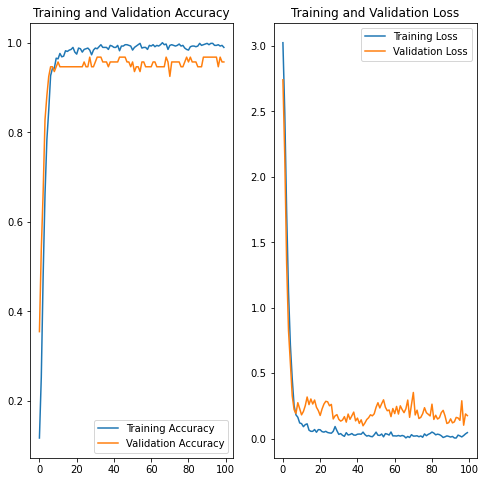

In [37]:
graphmodel(icehistory)

In [40]:
icemodel.evaluate(icetest_ds)

TypeError: 'TakeDataset' object is not subscriptable

In [53]:
%%time

vartracker = []

for poketype in typelist:
    train = poketype + "_train_ds"
    val = poketype + "_val_ds"
    test = poketype + "_test_ds"
    model = poketype + "_model"
    history = poketype + "_history"
    varlist = [train, val, test, model, history]
    vartracker.append(varlist)
    vars()[train], vars()[val], vars()[test], vars()[model], vars()[history]= modelpokemon(poketype)

Found 3062 files belonging to 72 classes.
Using 2144 files for training.
Found 3062 files belonging to 72 classes.
Using 918 files for validation.
Epoch 1/50


C:\Users\nopto\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


67/67 [==============================] - 2s 16ms/step - loss: 4.0653 - accuracy: 0.0686 - val_loss: 3.6899 - val_accuracy: 0.2065
Epoch 2/50
67/67 [==============================] - 1s 9ms/step - loss: 2.9236 - accuracy: 0.2948 - val_loss: 2.3389 - val_accuracy: 0.5194
Epoch 3/50
67/67 [==============================] - 1s 9ms/step - loss: 1.6956 - accuracy: 0.5723 - val_loss: 1.3794 - val_accuracy: 0.7258
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 1.0221 - accuracy: 0.7416 - val_loss: 0.8926 - val_accuracy: 0.8161
Epoch 5/50
67/67 [==============================] - 1s 9ms/step - loss: 0.6727 - accuracy: 0.8223 - val_loss: 0.8480 - val_accuracy: 0.8484
Epoch 6/50
67/67 [==============================] - 1s 9ms/step - loss: 0.4850 - accuracy: 0.8531 - val_loss: 0.7788 - val_accuracy: 0.8548
Epoch 7/50
67/67 [==============================] - 1s 9ms/step - loss: 0.3921 - accuracy: 0.8885 - val_loss: 0.8113 - val_accuracy: 0.8645
Epoch 8/50
67/67 [============

23/23 [==============================] - 0s 11ms/step - loss: 0.2740 - accuracy: 0.9126 - val_loss: 0.3655 - val_accuracy: 0.9326
Epoch 9/50
23/23 [==============================] - 0s 9ms/step - loss: 0.2661 - accuracy: 0.9098 - val_loss: 0.3312 - val_accuracy: 0.9213
Epoch 10/50
23/23 [==============================] - 0s 11ms/step - loss: 0.1763 - accuracy: 0.9495 - val_loss: 0.3562 - val_accuracy: 0.9213
Epoch 11/50
23/23 [==============================] - 0s 10ms/step - loss: 0.1537 - accuracy: 0.9590 - val_loss: 0.3942 - val_accuracy: 0.9213
Epoch 12/50
23/23 [==============================] - 0s 11ms/step - loss: 0.1298 - accuracy: 0.9536 - val_loss: 0.3384 - val_accuracy: 0.9213
Epoch 13/50
23/23 [==============================] - 0s 9ms/step - loss: 0.1208 - accuracy: 0.9645 - val_loss: 0.2953 - val_accuracy: 0.9438
Epoch 14/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0996 - accuracy: 0.9672 - val_loss: 0.3600 - val_accuracy: 0.9213
Epoch 15/50
23/23 [==

23/23 [==============================] - 0s 9ms/step - loss: 0.1083 - accuracy: 0.9640 - val_loss: 0.6510 - val_accuracy: 0.8824
Epoch 16/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0901 - accuracy: 0.9709 - val_loss: 0.6956 - val_accuracy: 0.8706
Epoch 17/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0771 - accuracy: 0.9806 - val_loss: 0.7277 - val_accuracy: 0.8706
Epoch 18/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0674 - accuracy: 0.9751 - val_loss: 0.8891 - val_accuracy: 0.8706
Epoch 19/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0979 - accuracy: 0.9778 - val_loss: 0.6719 - val_accuracy: 0.8824
Epoch 20/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0744 - accuracy: 0.9834 - val_loss: 0.7646 - val_accuracy: 0.8941
Epoch 21/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.8039 - val_accuracy: 0.8824
Epoch 22/50
23/23 [=====

40/40 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.7148 - val_accuracy: 0.9027
Epoch 23/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0832 - accuracy: 0.9721 - val_loss: 0.6464 - val_accuracy: 0.9081
Epoch 24/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0753 - accuracy: 0.9745 - val_loss: 0.8096 - val_accuracy: 0.8811
Epoch 25/50
40/40 [==============================] - 0s 10ms/step - loss: 0.0750 - accuracy: 0.9793 - val_loss: 0.7342 - val_accuracy: 0.8811
Epoch 26/50
40/40 [==============================] - 0s 10ms/step - loss: 0.1072 - accuracy: 0.9657 - val_loss: 0.7809 - val_accuracy: 0.8757
Epoch 27/50
40/40 [==============================] - 0s 10ms/step - loss: 0.0837 - accuracy: 0.9753 - val_loss: 0.7326 - val_accuracy: 0.8703
Epoch 28/50
40/40 [==============================] - 0s 10ms/step - loss: 0.0685 - accuracy: 0.9769 - val_loss: 0.7604 - val_accuracy: 0.9027
Epoch 29/50
40/40 [==

17/17 [==============================] - 0s 9ms/step - loss: 0.0507 - accuracy: 0.9883 - val_loss: 0.8524 - val_accuracy: 0.9167
Epoch 30/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0670 - accuracy: 0.9845 - val_loss: 0.8546 - val_accuracy: 0.9167
Epoch 31/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9922 - val_loss: 0.7885 - val_accuracy: 0.9167
Epoch 32/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.8026 - val_accuracy: 0.9167
Epoch 33/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.8533 - val_accuracy: 0.9000
Epoch 34/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.8974 - val_accuracy: 0.9000
Epoch 35/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.8812 - val_accuracy: 0.9000
Epoch 36/50
17/17 [======

25/25 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.9709 - val_accuracy: 0.8532
Epoch 37/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9936 - val_loss: 1.0542 - val_accuracy: 0.8716
Epoch 38/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9884 - val_loss: 0.8674 - val_accuracy: 0.8807
Epoch 39/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.7981 - val_accuracy: 0.8716
Epoch 40/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.9949 - val_loss: 1.0650 - val_accuracy: 0.8807
Epoch 41/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 0.9961 - val_loss: 0.8778 - val_accuracy: 0.8716
Epoch 42/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.8591 - val_accuracy: 0.8899
Epoch 43/50
25/25 [======

48/48 [==============================] - 0s 9ms/step - loss: 0.0513 - accuracy: 0.9829 - val_loss: 0.7569 - val_accuracy: 0.9024
Epoch 44/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.9888 - val_loss: 0.7420 - val_accuracy: 0.9073
Epoch 45/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.8845 - val_accuracy: 0.9073
Epoch 46/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.7780 - val_accuracy: 0.9073
Epoch 47/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.8157 - val_accuracy: 0.9024
Epoch 48/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0440 - accuracy: 0.9882 - val_loss: 0.9080 - val_accuracy: 0.9024
Epoch 49/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.9203 - val_accuracy: 0.8976
Epoch 50/50
48/48 [======

22/22 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9985 - val_loss: 1.1157 - val_accuracy: 0.8333
Found 2974 files belonging to 78 classes.
Using 2082 files for training.
Found 2974 files belonging to 78 classes.
Using 892 files for validation.
Epoch 1/50
66/66 [==============================] - 2s 16ms/step - loss: 4.2881 - accuracy: 0.0312 - val_loss: 4.1473 - val_accuracy: 0.0634
Epoch 2/50
66/66 [==============================] - 1s 9ms/step - loss: 3.6476 - accuracy: 0.1619 - val_loss: 2.8743 - val_accuracy: 0.4155
Epoch 3/50
66/66 [==============================] - 1s 9ms/step - loss: 2.3470 - accuracy: 0.4236 - val_loss: 1.7054 - val_accuracy: 0.6268
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 1.5283 - accuracy: 0.6009 - val_loss: 1.1739 - val_accuracy: 0.7782
Epoch 5/50
66/66 [==============================] - 1s 9ms/step - loss: 0.9874 - accuracy: 0.7464 - val_loss: 0.9290 - val_accuracy: 0.8451
Epoch 6/50
66/66 [=====

34/34 [==============================] - 0s 9ms/step - loss: 0.5345 - accuracy: 0.8363 - val_loss: 1.2109 - val_accuracy: 0.8106
Epoch 7/50
34/34 [==============================] - 0s 9ms/step - loss: 0.3270 - accuracy: 0.8997 - val_loss: 1.1449 - val_accuracy: 0.8182
Epoch 8/50
34/34 [==============================] - 0s 10ms/step - loss: 0.3028 - accuracy: 0.9073 - val_loss: 1.2483 - val_accuracy: 0.8409
Epoch 9/50
34/34 [==============================] - 0s 10ms/step - loss: 0.2102 - accuracy: 0.9290 - val_loss: 1.2105 - val_accuracy: 0.8485
Epoch 10/50
34/34 [==============================] - 0s 10ms/step - loss: 0.1651 - accuracy: 0.9584 - val_loss: 1.2060 - val_accuracy: 0.8485
Epoch 11/50
34/34 [==============================] - 0s 9ms/step - loss: 0.1270 - accuracy: 0.9603 - val_loss: 1.2612 - val_accuracy: 0.8485
Epoch 12/50
34/34 [==============================] - 0s 10ms/step - loss: 0.0972 - accuracy: 0.9707 - val_loss: 1.4713 - val_accuracy: 0.8636
Epoch 13/50
34/34 [=====

21/21 [==============================] - 0s 9ms/step - loss: 0.0678 - accuracy: 0.9774 - val_loss: 0.1890 - val_accuracy: 0.9570
Epoch 14/50
21/21 [==============================] - 0s 9ms/step - loss: 0.1034 - accuracy: 0.9759 - val_loss: 0.2659 - val_accuracy: 0.9570
Epoch 15/50
21/21 [==============================] - 0s 9ms/step - loss: 0.0771 - accuracy: 0.9759 - val_loss: 0.1915 - val_accuracy: 0.9462
Epoch 16/50
21/21 [==============================] - 0s 9ms/step - loss: 0.0654 - accuracy: 0.9774 - val_loss: 0.2029 - val_accuracy: 0.9570
Epoch 17/50
21/21 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 0.9820 - val_loss: 0.3200 - val_accuracy: 0.9355
Epoch 18/50
21/21 [==============================] - 0s 9ms/step - loss: 0.0837 - accuracy: 0.9774 - val_loss: 0.3317 - val_accuracy: 0.9355
Epoch 19/50
21/21 [==============================] - 0s 9ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.2996 - val_accuracy: 0.9462
Epoch 20/50
21/21 [======

Epoch 20/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1338 - accuracy: 0.9575 - val_loss: 0.6322 - val_accuracy: 0.9089
Epoch 21/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1078 - accuracy: 0.9657 - val_loss: 0.5867 - val_accuracy: 0.9044
Epoch 22/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1107 - accuracy: 0.9657 - val_loss: 0.6625 - val_accuracy: 0.9000
Epoch 23/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1167 - accuracy: 0.9636 - val_loss: 0.6253 - val_accuracy: 0.8978
Epoch 24/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1216 - accuracy: 0.9639 - val_loss: 0.6921 - val_accuracy: 0.9000
Epoch 25/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1111 - accuracy: 0.9666 - val_loss: 0.6392 - val_accuracy: 0.9067
Epoch 26/50
103/103 [==============================] - 1s 9ms/step - loss: 0.1102 - accuracy: 0.9684 - val_loss: 0.6221 - val_accuracy: 0.9044

Epoch 27/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0759 - accuracy: 0.9827 - val_loss: 1.0176 - val_accuracy: 0.8867
Epoch 28/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0517 - accuracy: 0.9854 - val_loss: 0.9227 - val_accuracy: 0.8867
Epoch 29/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 1.0609 - val_accuracy: 0.8867
Epoch 30/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9918 - val_loss: 1.0491 - val_accuracy: 0.8800
Epoch 31/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 1.3243 - val_accuracy: 0.8667
Epoch 32/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9909 - val_loss: 1.2780 - val_accuracy: 0.8867
Epoch 33/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0412 - accuracy: 0.9891 - val_loss: 1.3051 - val_accuracy: 0.8800
Epoch 34/50
3

50/50 [==============================] - 0s 9ms/step - loss: 0.0601 - accuracy: 0.9765 - val_loss: 0.8309 - val_accuracy: 0.8974
Epoch 35/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.7369 - val_accuracy: 0.9026
Epoch 36/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0460 - accuracy: 0.9873 - val_loss: 0.8817 - val_accuracy: 0.9077
Epoch 37/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9886 - val_loss: 0.7649 - val_accuracy: 0.9026
Epoch 38/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.8253 - val_accuracy: 0.8974
Epoch 39/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.8505 - val_accuracy: 0.8923
Epoch 40/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0699 - accuracy: 0.9822 - val_loss: 0.8096 - val_accuracy: 0.8923
Epoch 41/50
50/50 [======

40/40 [==============================] - 0s 9ms/step - loss: 0.0410 - accuracy: 0.9851 - val_loss: 0.6771 - val_accuracy: 0.9202
Epoch 42/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0488 - accuracy: 0.9859 - val_loss: 0.7339 - val_accuracy: 0.9202
Epoch 43/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0527 - accuracy: 0.9804 - val_loss: 0.9327 - val_accuracy: 0.9202
Epoch 44/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0645 - accuracy: 0.9828 - val_loss: 0.8845 - val_accuracy: 0.9202
Epoch 45/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.7248 - val_accuracy: 0.9264
Epoch 46/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0510 - accuracy: 0.9859 - val_loss: 0.8576 - val_accuracy: 0.9202
Epoch 47/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.8616 - val_accuracy: 0.9264
Epoch 48/50
40/40 [======

20/20 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 1.2140 - val_accuracy: 0.9000
Epoch 49/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0195 - accuracy: 0.9967 - val_loss: 1.5118 - val_accuracy: 0.8571
Epoch 50/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.9967 - val_loss: 1.4798 - val_accuracy: 0.8714
Found 5305 files belonging to 114 classes.
Using 3714 files for training.
Found 5305 files belonging to 114 classes.
Using 1591 files for validation.
Epoch 1/50
117/117 [==============================] - 3s 15ms/step - loss: 4.6601 - accuracy: 0.0269 - val_loss: 4.3662 - val_accuracy: 0.1084
Epoch 2/50
117/117 [==============================] - 1s 9ms/step - loss: 3.6729 - accuracy: 0.1947 - val_loss: 2.9622 - val_accuracy: 0.3944
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 2.4263 - accuracy: 0.4410 - val_loss: 1.9010 - val_accuracy: 0.6224
Epoch 4/50
1

In [54]:
vartracker[16]

['Water_train_ds',
 'Water_val_ds',
 'Water_test_ds',
 'Water_model',
 'Water_history']

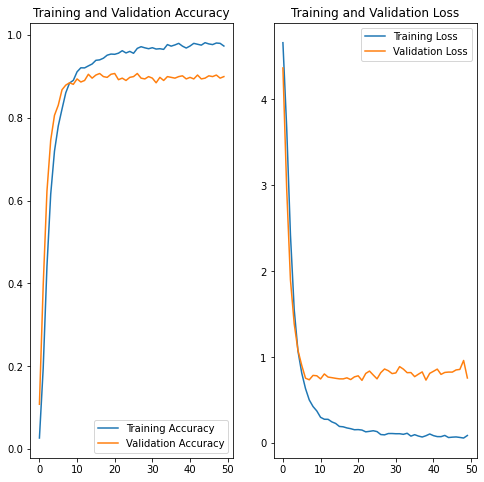

In [60]:
graphmodel(Water_history)